In [2]:
cd ../jecs

/Users/dan/Documents/GitHub/ExpPro/jecs


In [3]:
import torch
if torch.cuda.is_available():
  print('Numero di GPU disponibili: ',torch.cuda.device_count())
  for i in range(0,torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

# se la GPU è disponibile setto device='cuda', altrimenti 'cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")

Computation device: cpu



In [1]:
import os

directory_path = '/Users/dan/Downloads/download'
file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path)]
file_paths

['/Users/dan/Downloads/download/QCD_Pt-470to600_TuneZ2_7TeV_pythia6_merged.root',
 '/Users/dan/Downloads/download/GluGluToHToZZTo4L_M-125_7TeV-minloHJJ-pythia6-tauola_merged.root',
 '/Users/dan/Downloads/download/TTJets_MSDecays_central_TuneZ2_7TeV-madgraph-tauola_merged.root',
 '/Users/dan/Downloads/download/QCD_Pt-600to800_TuneZ2_7TeV_pythia6_merged.root']

In [12]:
from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 

fp=['~/Downloads/download/QCD_Pt-600to800_TuneZ2_7TeV_pythia6_merged.root']
pts2=[]
etas2=[]
area2=[]
npvs2=[]
gen_pts2=[]
jecs2=[]
for current_pts2, current_etas2, current_area2, current_npvs2, current_gen_pts2, current_jecs2 in load_root_files(fp):
    pts2.extend(current_pts2)
    etas2.extend(current_etas2)
    area2.extend(current_area2)
    npvs2.extend(current_npvs2)
    gen_pts2.extend(current_gen_pts2)
    jecs2.extend(current_jecs2)



In [30]:
pts2
dedup_pts2 = list(set(pts2))
len(dedup_pts2),len(pts2)

(11161121, 15836424)

In [13]:
import numpy as np
pts3=np.array(pts2)
etas3=np.array(etas2)
area3=np.array(area2)
npvs3=np.array(npvs2)
gen_pts3=np.array(gen_pts2)
jecs3=np.array(jecs2)

In [14]:
mask = pts3 > 450
pts3 = pts3[mask]
etas3 = etas3[mask]
area3 = area3[mask]
npvs3 = npvs3[mask]
gen_pts3 = gen_pts3[mask]
jecs3 = jecs3[mask]

In [32]:
#pts, etas, area, npvs, gen_pts, jecs 
# Create a hashtable (dictionary) for the first set of lists
hashtable = {}
for i in range(len(pts)):
    key = (pts[i], etas[i], area[i], jecs[i])
    if key not in hashtable:
        hashtable[key] = 1
    else:
        hashtable[key] += 1

In [33]:


# Initialize new lists for entries not in the hashtable
new_pts = []
new_etas = []
new_area = []
new_npvs = []
new_gen_pts = []
new_jecs = []

# Iterate over the second set of lists and check if the entries are not in the hashtable
for i in range(len(pts2)):
    key = (pts2[i], etas2[i], area2[i], jecs2[i])
    if key not in hashtable:
        new_pts.append(pts2[i])
        new_etas.append(etas2[i])
        new_area.append(area2[i])
        new_npvs.append(npvs2[i])
        new_gen_pts.append(gen_pts2[i])
        new_jecs.append(jecs2[i])

# Output the new lists
new_pts, new_etas, new_area, new_npvs, new_gen_pts, new_jecs
##pts2, etas2, area2, npvs2, gen_pts2, jecs2

([826.9889,
  766.51227,
  686.9728,
  585.48254,
  101.711136,
  26.186853,
  25.392538,
  666.35803,
  653.46936,
  27.643806,
  626.97974,
  392.9478,
  164.93907,
  77.307945,
  628.2661,
  574.45807,
  41.090626,
  791.7946,
  786.4114,
  629.67377,
  508.29202,
  97.36192,
  94.17105,
  21.383892,
  20.254717,
  651.8831,
  619.74585,
  52.848583,
  52.296085,
  644.22705,
  588.2858,
  590.6268,
  577.83746,
  70.30163,
  29.045155,
  673.00726,
  671.65515,
  583.24255,
  554.3455,
  38.36007,
  31.65081,
  28.535429,
  24.032206,
  507.30664,
  445.4191,
  177.9376,
  155.2234,
  95.33382,
  36.888615,
  24.681156,
  824.46643,
  628.963,
  131.76598,
  714.6052,
  692.07043,
  38.404694,
  38.234806,
  29.297525,
  661.16144,
  624.8741,
  700.88257,
  656.19073,
  36.321095,
  584.56586,
  565.46844,
  20.58584,
  591.9294,
  566.4342,
  45.38417,
  20.157478,
  559.58704,
  554.8387,
  405.30426,
  382.11252,
  54.94074,
  51.864555,
  783.94196,
  760.34424,
  34.277924,
 

In [34]:
len(new_pts), len(pts2)

(15836424, 15836424)

In [15]:
import numpy as np
#jec_dataset2 = JetEnergyCorrectionDataset(pts2, etas2, area2, npvs2, gen_pts2, jecs2)
x=np.transpose(np.array([pts3,etas3,area3,npvs3,gen_pts3]))
y=np.array(jecs3)

In [19]:
# Load the dataset

from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 


pts, etas, area, npvs, gen_pts, jecs = load_energy_flow()
"""
pts.extend(pts2)
etas.extend(etas2)
area.extend(area2)
npvs.extend(npvs2)
gen_pts.extend(gen_pts2)
jecs.extend(jecs2)"""

#jec_dataset = JetEnergyCorrectionDataset(pts, etas, area, npvs, gen_pts, jecs)

'\npts.extend(pts2)\netas.extend(etas2)\narea.extend(area2)\nnpvs.extend(npvs2)\ngen_pts.extend(gen_pts2)\njecs.extend(jecs2)'

In [20]:
import numpy as np
#jec_dataset2 = JetEnergyCorrectionDataset(pts2, etas2, area2, npvs2, gen_pts2, jecs2)
x2=np.transpose(np.array([pts,etas,area,npvs,gen_pts]))
y2=np.array(jecs)

Test MSE: 0.12076165527105331


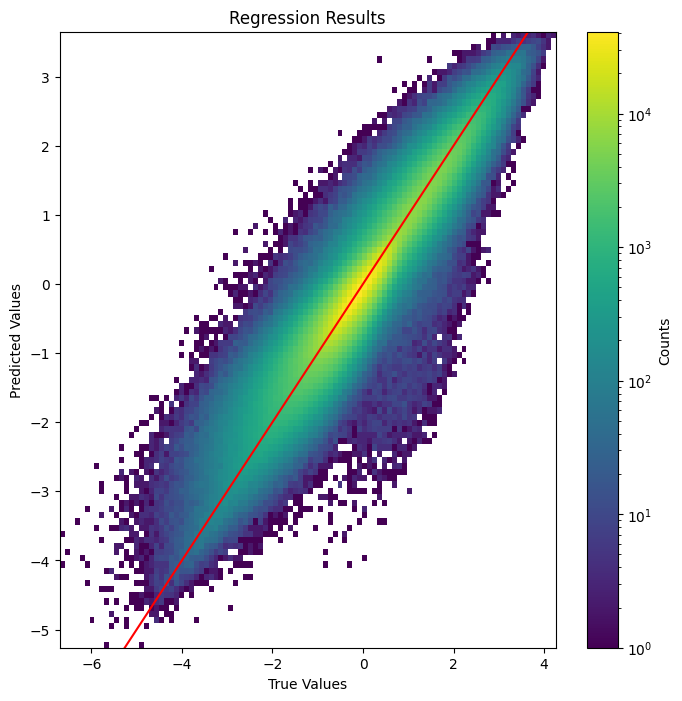

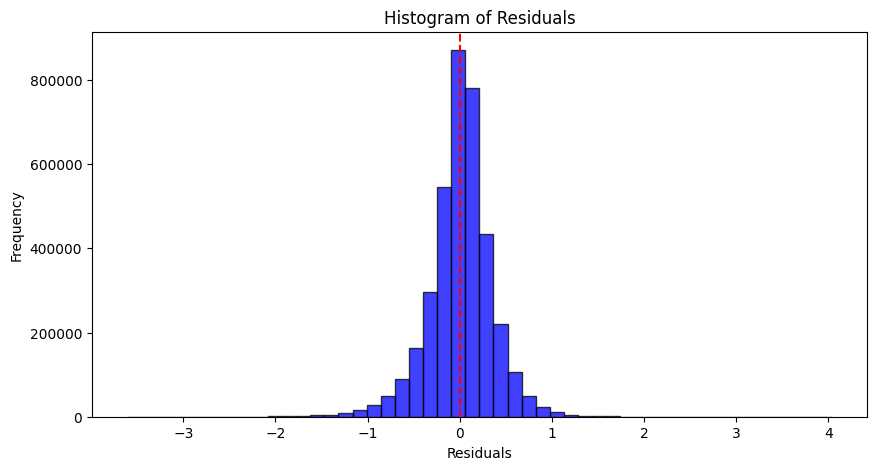

In [21]:
import importlib
import dataset
importlib.reload(dataset)

import eval_multiple_src as eval
from j_model import ShallowMLP

importlib.reload(eval)
eval.run(x,y)

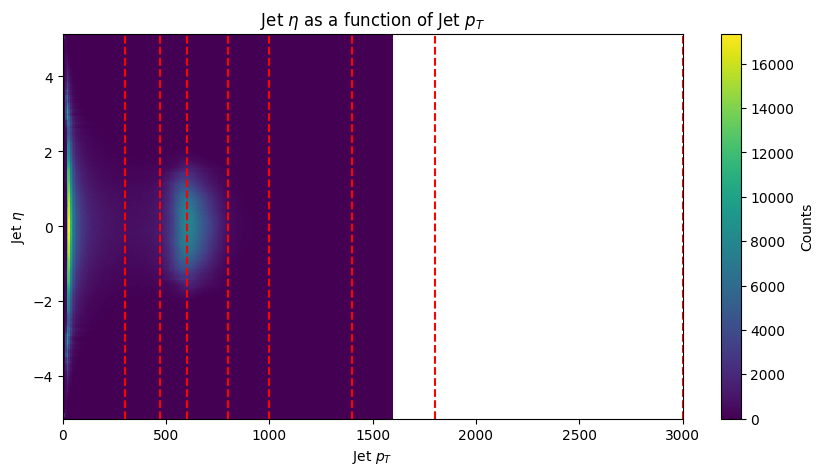

In [28]:
#not relevant to the model, just the data itself
from matplotlib import pyplot as plt
bins=np.array([300,470,600,800,1000,1400,1800,3000])

plt.figure(figsize=(10, 5))
plt.hist2d(pts2, etas2, bins=[200, 200], cmap='viridis')
plt.xlabel('Jet $p_T$')
plt.ylabel('Jet $\eta$')
plt.title('Jet $\eta$ as a function of Jet $p_T$')
plt.colorbar(label='Counts')

# Plot vertical lines for each bin value
for bin_value in bins:
    plt.axvline(x=bin_value, color='red', linestyle='--')

plt.xlim(0, 3000)

plt.show()
